# Chapter 7.3: Higgs Decay into a Fermion-Pair

Hff coupling: $g_{Hff} = -im_f/v$

Compute the decay width $\Gamma(H\to f\bar{f})$ (eq. 7.93 in the book) with sympy.

In [1]:
import heppackv0 as hep
import sympy as sy

Reading heppackv0.py (March 2023)

Done


In [2]:
# M=Higgs mass, m=fermion mass, v=246 GeV
# Use Dm instead of E to define that the arguments of sqare roots are always positiv
# Later replace Dm --> M/2-m
M,m,Dm,v = sy.symbols("M,m,Dm,v" , positive=True, real=True) 

In [3]:
pf = [Dm+m, m, 0, 0] # fermion, [E,m,theta, phi)
pa = [Dm+m, m, sy.pi, sy.pi] # anti-fermion
uf = hep.u(pf,-1)
ua = hep.v(pa,-1)

In [4]:
# Matrix element H-> ff
# hf, ha: helicities of fermion and anti-fermion
def mel(pf, pa, hf, ha):
    pre = -sy.I*m/v # Hff coupling
    me = hep.ubar(pf, hf) * hep.v(pa, ha)
    return sy.simplify(pre*me)

In [5]:
def mel2(pf, pa, showAmplitude=True):
    """ 
    Calculate spin averaged matrix element of Higgs decay to a fermion pair 
    """    
    if showAmplitude: print("hf  ha")
    hels   = (-1, 1)
    me2sum = sy.Matrix([0])
    for hf in hels:
        for ha in hels:         
            me     = mel(pf, pa, hf, ha)
            me2    = me*me.conjugate()
            me2sum += me2
            me2sum =  sy.simplify(me2sum)

            if showAmplitude:
                sh = "{0:2}   {1:2} ".format(hf,ha)
                sme = me.tolist()[0][0]
                sme2 = sme.subs(Dm, M/2-m)
                sme3 = sy.simplify(sme2)
                print(sh, sme3)
    sme2sum = me2sum.tolist()[0][0]
    sme3sum = sy.simplify(sme2sum.subs(Dm, M/2-m))
    return sme3sum

hf  ha
-1   -1  I*m*sqrt(M - 2*m)*sqrt(M + 2*m)/v
-1    1  0
 1   -1  0
 1    1  I*m*sqrt(M - 2*m)*sqrt(M + 2*m)/v
mel2Hff:  2*m**2*(M**2 - 4*m**2)/v**2


'Gamma: '

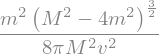

In [6]:
# apply factors  
mel2Hff = mel2(pf, pa, showAmplitude=True)
print("mel2Hff: ", mel2Hff)
pre2= sy.sqrt(M**2/4 - m**2) /(8*sy.pi*M**2)
Gamma = sy.simplify(pre2*mel2Hff)
display("Gamma: ", Gamma)

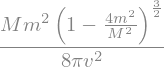

In [7]:
# compare to Book, eq. 7.93
betaf = sy.sqrt(1-4*m**2/M**2)
GammaBook = m**2*betaf**3*M/(8*sy.pi*v**2)
GammaBook

<hr style="width:100%;height:2px;color:black">

In [8]:
# test equality
sy.simplify(Gamma-GammaBook)